In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.dates as mpd
import cmocean as cm
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sys import platform

%matplotlib inline

In [2]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
    out_dir = '/Users/rmueller/Documents/Presentations/2020/OceanSciences2020/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'
    out_dir = '/home/vdo/'
    
# Set to [1] if you want to print to file and [0] if not
print_to_file = 1  

In [3]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'

In [16]:
diesel_bio = xr.open_dataset(results_dir + 'MIDOSS/results/OS2020/diesel/SB/Lagrangian_DieselFuel_refined_SB_RDMbio_15jan18-22jan18_Diesel.nc')
diesel = xr.open_dataset(results_dir + 'MIDOSS/results/OS2020/diesel/SB/Lagrangian_DieselFuel_refined_SB_15jan18-22jan18_Diesel.nc')

In [17]:
diesel_bio_time = diesel_bio.Beaching_Time[:]
start_time = np.datetime64('2018-01-15T00:30:00')

diesel_time = diesel.Beaching_Time[:]

In [8]:
[ny,nx]=diesel_bio_time.shape

In [9]:
x_range = range(nx)
y_range = range(ny)

In [10]:
diesel_bio_time_asnum = np.array([[((np.datetime64(diesel_bio_time.values[jj,ii]) - start_time ) / np.timedelta64(1, 'D')) for ii in x_range] for jj in y_range])

In [ ]:
diesel_bio_time_asnum = np.array([[((np.datetime64(diesel_bio_time.values[jj,ii]) - start_time ) / np.timedelta64(1, 'D')) for ii in x_range] for jj in y_range])

In [11]:
diesel_bio_time_asnum[diesel_bio_time_asnum==0] = np.nan

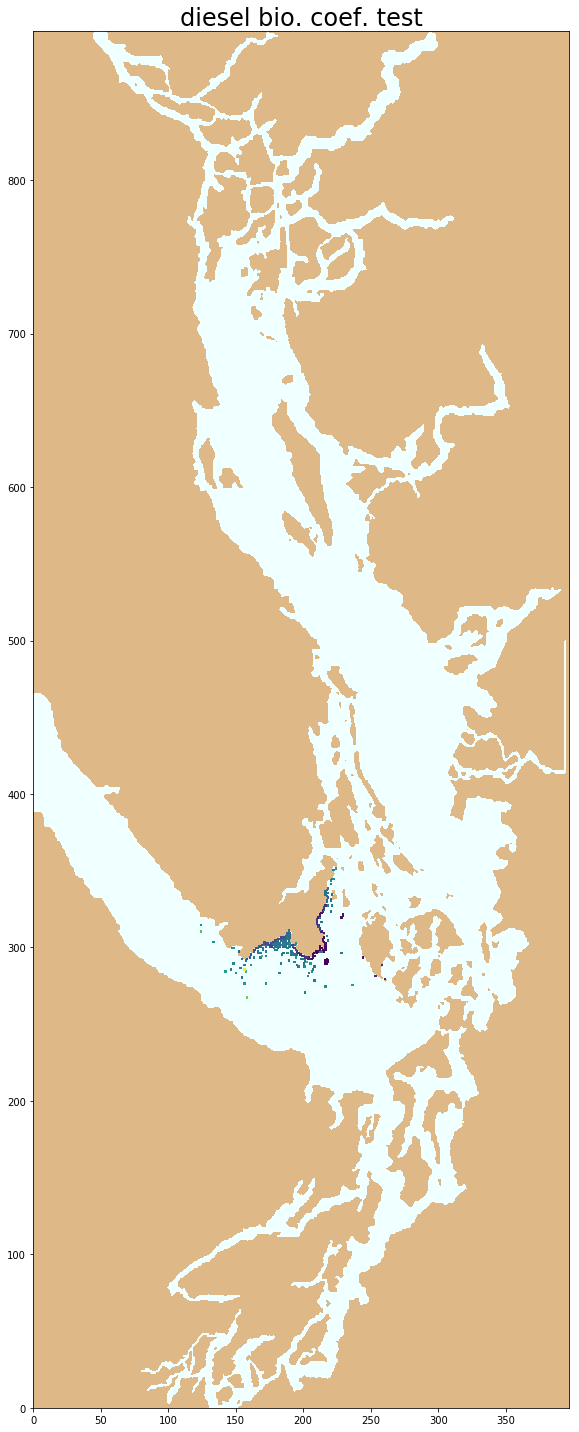

In [14]:
fig, axs = plt.subplots(1,1, figsize=(40,20))

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(axs,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# add beaching time scales
mappable = axs.pcolormesh(diesel_bio_time_asnum,)

axs.set_title("diesel bio. coef. test", fontsize=24)

axs.set_facecolor('azure')
#axs.get_xaxis().set_visible(False)
#axs.get_yaxis().set_visible(False)
viz_tools.set_aspect(axs)
#axs.set_xlim(100,300) #change this to set x axis limits
#axs.set_ylim(450,700) #change this to set y axis limits
#axs.set_xticklabels(fontdict={'fontsize':24})    
plt.tight_layout();

#ax_cbar = fig.add_axes([1.02,0.11,0.025,.78])
cbar = plt.colorbar(mappable, cax=ax_cbar, orientation='vertical')